# Visualização Gráfica de Dados
## A biblioteca *seaborn*

A biblioteca *seaborn* foi construída em cima do *matplotlib* e fornece essencialmente duas coisas:
 * estilo aos gráficos, o que os torna tipicamente muito mais bonitos visualmente;
 * "agrupa" diversos comandos gráficos do *matplotlib* dentro de um único comando, o que tipicamente torna simples a realização de gráficos com bastante elementos.

Vamos começar importando as bibliotecas que utilizaremos:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Vamos construir e importar os *DataFrames* que utilizaremos:

In [2]:
serie_Idade = pd.Series({'Ana':20, 'João': 19, 'Maria': 21, 'Pedro': 22, 'Túlio': 20}, name="Idade")
serie_Peso = pd.Series({'Ana':55, 'João': 80, 'Maria': 62, 'Pedro': 67, 'Túlio': 73}, name="Peso")
serie_Altura = pd.Series({'Ana':162, 'João': 178, 'Maria': 162, 'Pedro': 165, 'Túlio': 171}, name="Altura")

In [3]:
dicionario_series_exemplo = {'Idade': serie_Idade, 'Peso': serie_Peso, 'Altura': serie_Altura}

In [4]:
df_dict_series = pd.DataFrame(dicionario_series_exemplo);df_dict_series

,Idade,Peso,Altura
Ana,20,55,162
João,19,80,178
Maria,21,62,162
Pedro,22,67,165
Túlio,20,73,171


In [6]:
df_exemplo = pd.read_csv('06b-exemplo_data.csv', index_col=0)
df_exemplo['coluna_3'] = pd.Series([1,2,3,4,5,6,7,8,np.nan,np.nan],index=df_exemplo.index)
df_exemplo.index = pd.to_datetime(df_exemplo.index)
df_exemplo

,coluna_1,coluna_2,coluna_3
2020-01-01,-0.416092,1.810364,1.0
2020-01-02,-0.137970,2.578520,2.0
2020-01-03,0.575827,0.060866,3.0
2020-01-04,-0.017367,1.299587,4.0
2020-01-05,1.384279,-0.381732,5.0
2020-01-06,0.549706,-1.308789,6.0
2020-01-07,-0.282296,-1.688979,7.0
2020-01-08,-0.989730,-0.028121,8.0
2020-01-09,0.275582,-0.177659,NaN
2020-01-10,0.685132,0.502535,NaN


In [7]:
covid_PB = pd.read_csv('https://superset.plataformatarget.com.br/superset/explore_json/?form_data=%7B%22slice_id%22%3A1550%7D&csv=true', 
                             sep=',', index_col=0)
covid_PB.head()

,casosAcumulados,casosNovos,descartados,recuperados,obitosAcumulados,obitosNovos,Letalidade
data,,,,,,,
2021-02-03,194519,1054,234902,149248,4096,14,0.0211
2021-02-02,193465,867,234366,149242,4082,14,0.0211
2021-02-01,192598,1014,234215,149235,4068,12,0.0211
2021-01-31,191584,1104,234198,148856,4056,8,0.0212
2021-01-30,190480,1065,233698,148722,4048,12,0.0213


In [8]:
covid_BR = pd.read_excel('08a-HIST_PAINEL_COVIDBR_25jul2020.xlsx')
covid_BR.head()

,Unnamed: 0,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125,0,0,0,0,NaN,NaN,NaN
1,1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125,1,1,0,0,NaN,NaN,NaN
2,2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125,1,0,0,0,NaN,NaN,NaN
3,3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125,1,0,0,0,NaN,NaN,NaN
4,4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125,2,1,0,0,NaN,NaN,NaN


## Gráficos de Linha e de Dispersão

* Os gráficos de linha e de dispersão podem ser realizados no *seaborn* com a função **relplot**.
 * Para fazer um gráfico de linha escolhemos *kind = "line"*;
 * O gráfico de dispersão é o padrão (*kind  = "scatter"*).

* Alternativamente podemos utilizar as funções **lineplot** e **scatterplot**. Porém, **lineplot** e **scatterplot** são apenas eixos e se comportam essencialmente como o *matplotlib* ao passo que **relplot** tem diversos elementos da construção de uma figura no *matplotlib* já pré-configurados (isto é chamado no *seaborn* de *figure-level plot*).

Inicialmente vamos ilustrar com a função **lineplot** que, como dito, se comporta bastante com as funções do *matplotlib.pyplot*.

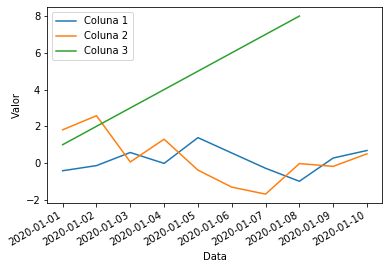

In [9]:
fig, ax = plt.subplots()
ax = sns.lineplot(x="index", y="coluna_1", data=df_exemplo.reset_index(), label = 'Coluna 1')
ax = sns.lineplot(x="index", y="coluna_2", data=df_exemplo.reset_index(), ax = ax, label = 'Coluna 2')
ax = sns.lineplot(x="index", y="coluna_3", data=df_exemplo.reset_index(), ax = ax, label = 'Coluna 3')
ax.set_xlabel('Data')
ax.set_ylabel('Valor')
fig.autofmt_xdate()

Para utilizar a função **relplot** precisaremos preparar o banco de dados no mesmo estilo do *plotly.express*:

In [10]:
df_exemplo_px = pd.DataFrame(df_exemplo['coluna_1']).rename({'coluna_1':'Valor'}, axis=1)
df_exemplo_px['Coluna'] = 'Coluna 1' 
df_exemplo_px_temp = pd.DataFrame(df_exemplo['coluna_2']).rename({'coluna_2':'Valor'}, axis=1)
df_exemplo_px_temp['Coluna'] = 'Coluna 2'
df_exemplo_px = pd.concat([df_exemplo_px, df_exemplo_px_temp])
df_exemplo_px_temp = pd.DataFrame(df_exemplo['coluna_3']).rename({'coluna_3':'Valor'}, axis=1)
df_exemplo_px_temp['Coluna'] = 'Coluna 3'
df_exemplo_px = pd.concat([df_exemplo_px, df_exemplo_px_temp])
df_exemplo_px.head()

,Valor,Coluna
2020-01-01,-0.416092,Coluna 1
2020-01-02,-0.137970,Coluna 1
2020-01-03,0.575827,Coluna 1
2020-01-04,-0.017367,Coluna 1
2020-01-05,1.384279,Coluna 1


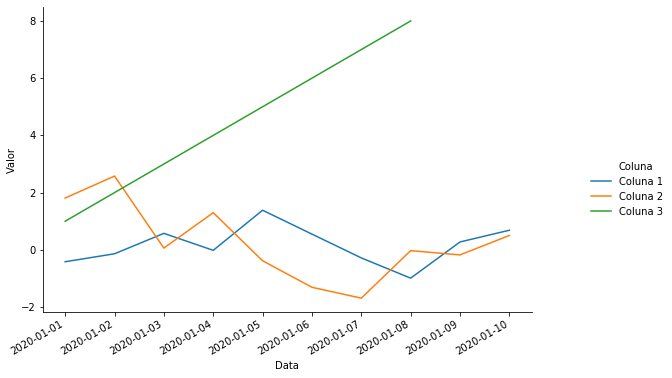

In [11]:
grafico = sns.relplot(x = 'index', y='Valor', hue = 'Coluna', data=df_exemplo_px.reset_index().dropna(), kind='line')
grafico.fig.autofmt_xdate()
grafico.ax.set_xlabel('Data')
grafico.fig.set_size_inches(10,5.5)

Vamos agora fazer o gráfico de óbitos por COVID-19 na Paraíba juntamente com a média aritmética móvel de 7 dias e com a média geométrica móvel de 7 dias.

* A média aritmética tem a desvantagem de linearizar o efeito do crescimento ou decrescimento do número de óbitos, onde sabemos que o efeito é exponencial.
* A média geométrica móvel tem a desvantagem de dar zero se o número de óbitos em algum dos dias da janela for zero.
* Em geral as duas médias ficam muito próximas.

Utilizaremos o método *rolling* de uma *Serie* ou *DataFrame* do *pandas*. Este método cria janelas móveis onde podemos aplicar uma função agregadora (tal como média ou média geométrica).

In [12]:
from scipy.stats import gmean # Obtendo a função que calcula média geométrica do scipy

covid_PB_obitos = covid_PB.obitosNovos
covid_PB_obitos = covid_PB_obitos.sort_index()
covid_PB_obitos.name = 'Óbitos'
covid_PB_obitos_df = pd.DataFrame(covid_PB_obitos)
covid_PB_obitos_df['Tipo'] = 'Valor Nominal'
covid_PB_obitos_df_temp = pd.DataFrame(covid_PB_obitos.rolling(7).mean().dropna())
covid_PB_obitos_df_temp['Tipo'] = 'Média Aritmética Móvel 7 Dias'
covid_PB_obitos_df = pd.concat([covid_PB_obitos_df, covid_PB_obitos_df_temp])
covid_PB_obitos_df_temp = pd.DataFrame(covid_PB_obitos.rolling(7).aggregate(gmean).dropna())
covid_PB_obitos_df_temp['Tipo'] = 'Média Geométrica Móvel 7 Dias'
covid_PB_obitos_df = pd.concat([covid_PB_obitos_df, covid_PB_obitos_df_temp])
covid_PB_obitos_df.index = pd.to_datetime(covid_PB_obitos_df.index)
covid_PB_obitos_df.tail()

,Óbitos,Tipo
data,,
2021-01-30,11.417941,Média Geométrica Móvel 7 Dias
2021-01-31,10.775362,Média Geométrica Móvel 7 Dias
2021-02-01,10.910138,Média Geométrica Móvel 7 Dias
2021-02-02,11.153061,Média Geométrica Móvel 7 Dias
2021-02-03,11.543999,Média Geométrica Móvel 7 Dias


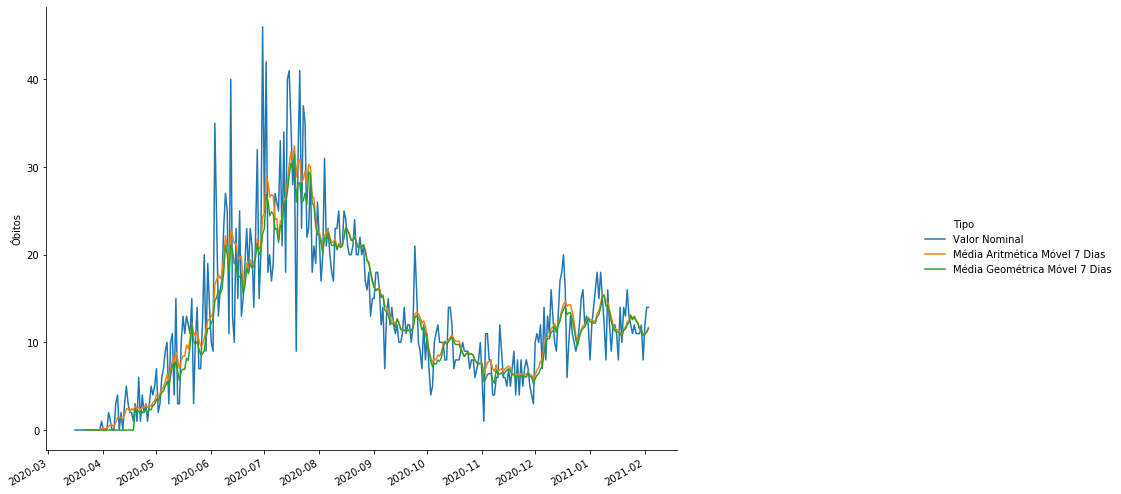

In [13]:
grafico = sns.relplot(x = 'data', y='Óbitos', hue = 'Tipo', data=covid_PB_obitos_df.reset_index(), kind='line')
grafico.fig.autofmt_xdate()
grafico.ax.set_xlabel(''); grafico.fig.set_size_inches(17,8)

* Vamos agora construir um gráfico de dispersão com o conjunto de dados *df_exemplo_px*:

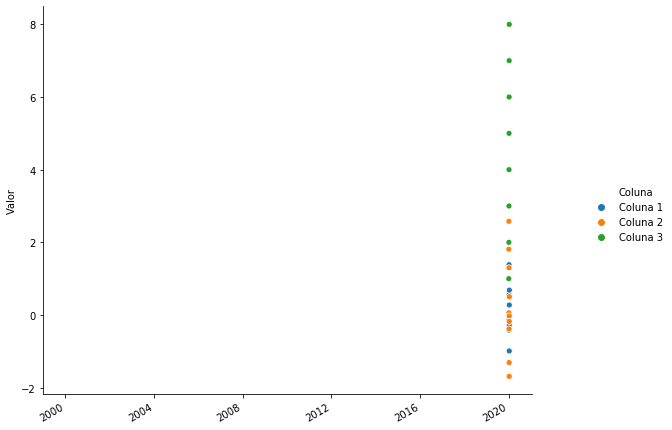

In [14]:
grafico = sns.relplot(x = 'index', y='Valor', hue = 'Coluna', data=df_exemplo_px.reset_index().dropna())
grafico.fig.autofmt_xdate()
grafico.ax.set_xlabel(''); grafico.fig.set_size_inches(10,7)

Infelizmente o *seaborn* apresenta este problema com datas e a origem do erro não é do *seaborn* em si e sim como o *matplotlib* interpreta datas. Mais detalhes em:
https://github.com/mwaskom/seaborn/issues/1641

Vamos forçar os limites a ficarem dentro do mínimo (menos um dia) e do máximo (mais um dia):

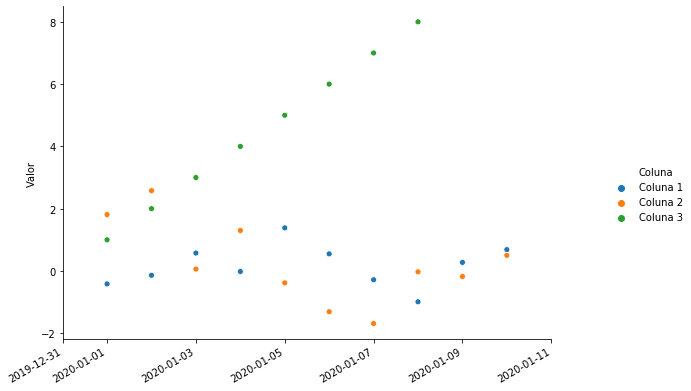

In [15]:
grafico = sns.relplot(x = 'index', y='Valor', hue = 'Coluna', data=df_exemplo_px.reset_index().dropna())
grafico.ax.set_xlim((df_exemplo_px.reset_index()['index'].min() - pd.DateOffset(days=1)), 
                    (df_exemplo_px.reset_index()['index'].max() + pd.DateOffset(days=1)))
grafico.fig.autofmt_xdate()
grafico.ax.set_xlabel(''); grafico.fig.set_size_inches(10,6)

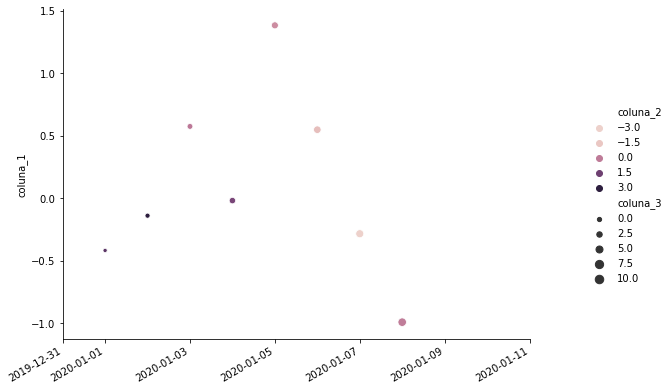

In [16]:
grafico = sns.relplot(x = 'index', y='coluna_1', hue = 'coluna_2', size = 'coluna_3', data=df_exemplo.reset_index().dropna())
grafico.ax.set_xlim((df_exemplo.reset_index()['index'].min() - pd.DateOffset(days=1)), 
                    (df_exemplo.reset_index()['index'].max() + pd.DateOffset(days=1)))
grafico.fig.autofmt_xdate()
grafico.ax.set_xlabel('')
grafico.fig.set_size_inches(10,6)

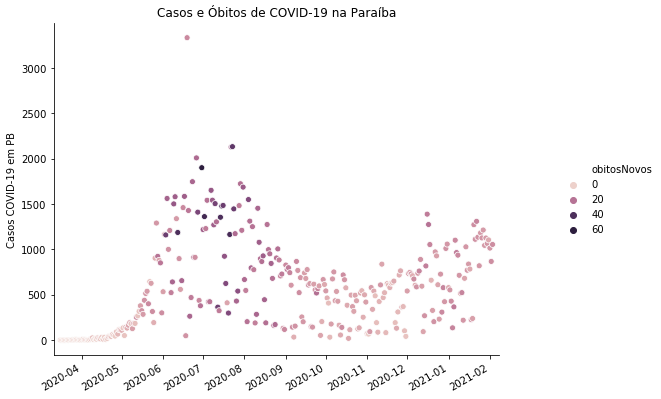

In [17]:
covid_PB_casos_obitos = covid_PB[['obitosNovos', 'casosNovos']].sort_index()
covid_PB_casos_obitos.index = pd.to_datetime(covid_PB_casos_obitos.index)
grafico =  sns.relplot(x = 'data', y = 'casosNovos', hue = 'obitosNovos', data=covid_PB_casos_obitos.reset_index())
grafico.ax.set_xlim((covid_PB_casos_obitos.reset_index()['data'].min()-pd.DateOffset(days=5)), 
                    (covid_PB_casos_obitos.reset_index()['data'].max()+ pd.DateOffset(days=5)))
grafico.fig.autofmt_xdate()
grafico.ax.set_xlabel('')
grafico.ax.set_ylabel('Casos COVID-19 em PB')
grafico.ax.set_title('Casos e Óbitos de COVID-19 na Paraíba')
grafico.fig.set_size_inches(10,6)

## Gráficos de Dispersão em dados categóricos

* Neste caso, podemos ter muitos valores repetidos em uma variável, e os gráficos de dispersão podem não ilustrar efetivamente o comportamento dos dados.

* Seria interessante gráficos que considerem a repetição de valores dentro de uma mesma categoria.


## Alternativas aos Gráficos de Dispersão

No caso de termos muitas valores repetidos em uma variável, os gráficos de dispersão deixam de ser eficientes para ilustrar o comportamento dos dados.

Neste sentido, precisamos de gráficos que considerem a repetição de valores.

**Obs:** Isto acontece quando o eixo horizontal contém variáveis categóricas, e assim, teríamos repetição de valores dentro de uma mesma categoria.

Para estes gráficos vamos utilizar os dados de óbitos por COVID-19 no Brasil. Vamos agrupar o número de óbitos por dia da semana.

In [18]:
covid_BR_obitos = covid_BR.query('regiao == "Brasil"')[['obitosNovos','data']]

covid_BR_obitos.data = pd.to_datetime(covid_BR_obitos.data)
covid_BR_obitos['Dia'] = covid_BR_obitos.data.dt.weekday.map({0:'Segunda-Feira',1:'Terça-Feira',2:'Quarta-Feira',
                                     3:'Quinta-Feira',4:'Sexta-Feira',5:'Sábado', 6:'Domingo'})
covid_BR_obitos = covid_BR_obitos.set_index('data')
covid_BR_obitos

,obitosNovos,Dia
data,,
2020-02-25,0,Terça-Feira
2020-02-26,0,Quarta-Feira
2020-02-27,0,Quinta-Feira
2020-02-28,0,Sexta-Feira
2020-02-29,0,Sábado
...,...,...
2020-07-21,1367,Terça-Feira
2020-07-22,1284,Quarta-Feira
2020-07-23,1311,Quinta-Feira


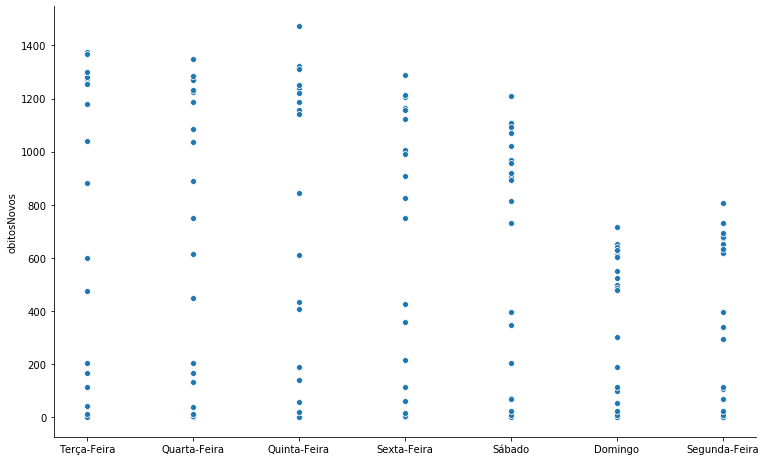

In [19]:
grafico = sns.relplot(x='Dia', y='obitosNovos', data=covid_BR_obitos)
# Se quisermos determinar a ordem do eixo x o relplot não é a função ideal, além disso devido à sobreposição dos dados, 
# ela definitivamente não é a ideal para variáveis categóricas.
grafico.ax.set_xlabel(''); grafico.fig.set_size_inches(13,7)

## O gráfico *stripplot*

* O *stripplot* é um gráfico de dispersão onde em cada observação é colocado um deslocamento aleatório para evitar a sobreposição e fornecer uma ideia mais precisa da quantidade de dados.

* Vamos construir o *stripplot* através da função **catplot**. O *stripplot* é o gráfico padrão do **catplot** (tem o argumento *kind = 'strip'*).

* Podemos determinar a ordem das variáveis categóricas com o argumento *order*.

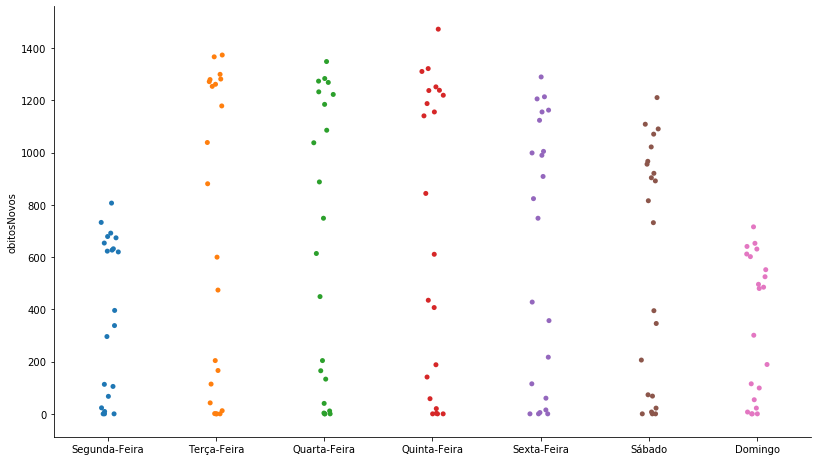

In [20]:
grafico = sns.catplot(x='Dia', y='obitosNovos', data=covid_BR_obitos, order = ['Segunda-Feira', 'Terça-Feira',
                                                'Quarta-Feira', 'Quinta-Feira', 'Sexta-Feira', 'Sábado', 'Domingo'])
grafico.ax.set_xlabel('');grafico.fig.set_size_inches(13,7)

Se colocarmos *jitter=False* obtemos o gráfico de dispersão usual (com o detalhe de que podemos definir a ordem dos rótulos do eixo *x*).

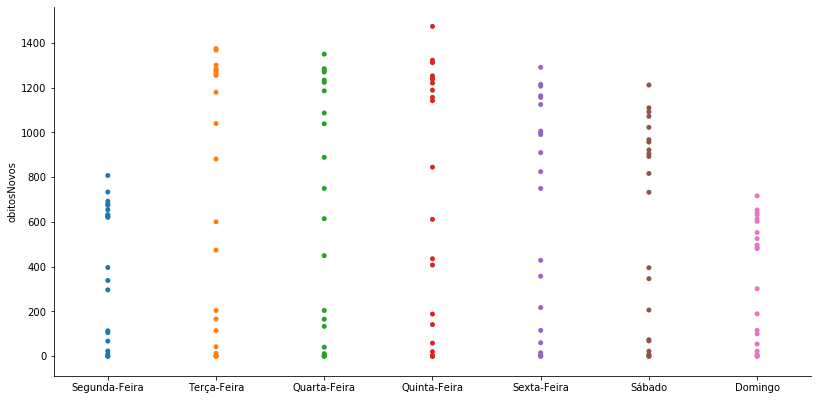

In [21]:
grafico = sns.catplot(x='Dia', y='obitosNovos', jitter = False, data=covid_BR_obitos, order = ['Segunda-Feira', 'Terça-Feira',
                                                'Quarta-Feira', 'Quinta-Feira', 'Sexta-Feira', 'Sábado', 'Domingo'])
grafico.ax.set_xlabel(''); grafico.fig.set_size_inches(13,6)

## O gráfico *swarmplot*

* O *swarmplot* é um gráfico de dispersão onde, diferentemente do *stripplot*, nenhum dado pode ficar sobreposto, desta forma também fornece uma ideia mais precisa da quantidade de dados.

* Vamos construir o *swarmplot* através da função **catplot** com o argumento *kind = 'swarm'*.

* Como o *swarmplot* também é um tipo do **catplot** podemos determinar a ordem das variáveis categóricas com o argumento *order*.

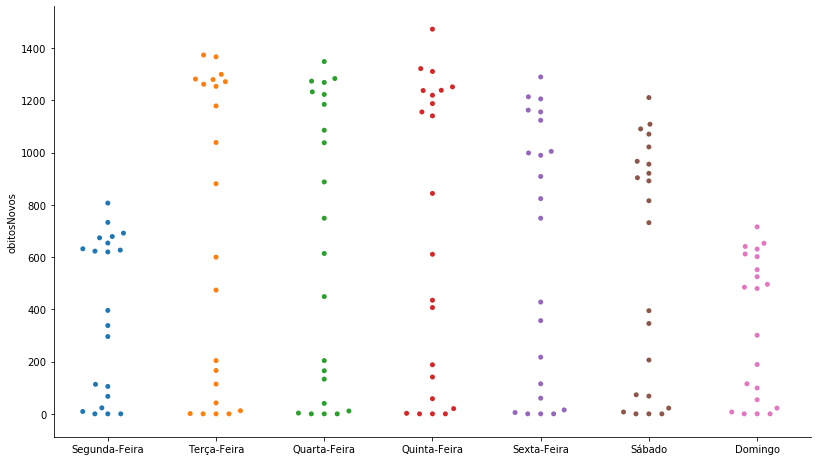

In [22]:
grafico = sns.catplot(x='Dia', y='obitosNovos', kind = 'swarm', data=covid_BR_obitos, order = ['Segunda-Feira', 'Terça-Feira',
                                                'Quarta-Feira', 'Quinta-Feira', 'Sexta-Feira', 'Sábado', 'Domingo'])
grafico.ax.set_xlabel(''); grafico.fig.set_size_inches(13,7)

## Gráficos de Barras e Colunas

* Para criar gráficos de barras e colunas com o *seaborn* utilizaremos a função **catplot** com o argumento *kind=bar*.

* Se a variável categórica estiver no eixo *x* o gráfico será de coluna;
* Se a variável categórica estiver no eixo *y* o gráfico será de barra.

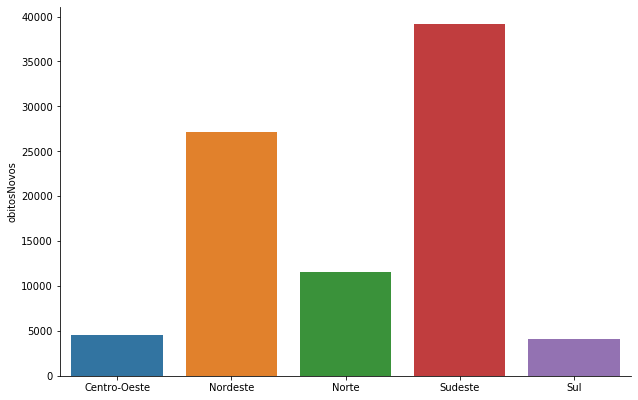

In [23]:
covid_Regioes = covid_BR[['regiao','obitosNovos']].groupby('regiao').sum().query('regiao != "Brasil"')/2

grafico = sns.catplot(x='regiao', y='obitosNovos', kind = 'bar',data=covid_Regioes.reset_index())
grafico.ax.set_xlabel(''); grafico.fig.set_size_inches(10,6)

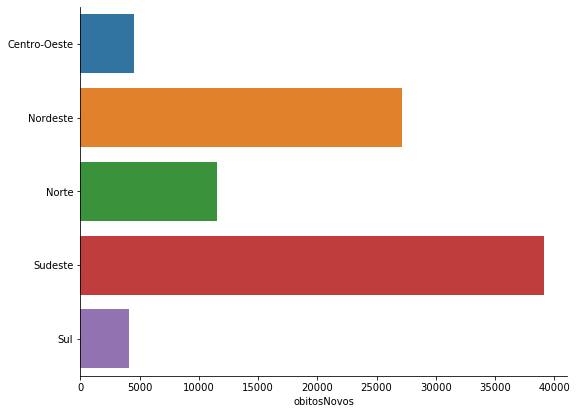

In [24]:
covid_Regioes = covid_BR[['regiao','obitosNovos']].groupby('regiao').sum().query('regiao != "Brasil"')/2

grafico = sns.catplot(x='obitosNovos', y='regiao', kind = 'bar',data=covid_Regioes.reset_index())
grafico.ax.set_ylabel('')
grafico.fig.set_size_inches(10,6)

In [25]:
df_dict_series_sns = pd.DataFrame(df_dict_series.Idade).rename({'Idade':'Valor'}, axis=1)
df_dict_series_sns['Dado'] = 'Idade'
df_dict_series_sns_temp = pd.DataFrame(df_dict_series.Altura).rename({'Altura':'Valor'}, axis=1)
df_dict_series_sns_temp['Dado'] = 'Altura'
df_dict_series_sns = pd.concat([df_dict_series_sns, df_dict_series_sns_temp])
df_dict_series_sns_temp = pd.DataFrame(df_dict_series.Peso).rename({'Peso':'Valor'}, axis=1)
df_dict_series_sns_temp['Dado'] = 'Peso'
df_dict_series_sns = pd.concat([df_dict_series_sns, df_dict_series_sns_temp])
df_dict_series_sns

,Valor,Dado
Ana,20,Idade
João,19,Idade
Maria,21,Idade
Pedro,22,Idade
Túlio,20,Idade
Ana,162,Altura
João,178,Altura
Maria,162,Altura
Pedro,165,Altura
Túlio,171,Altura


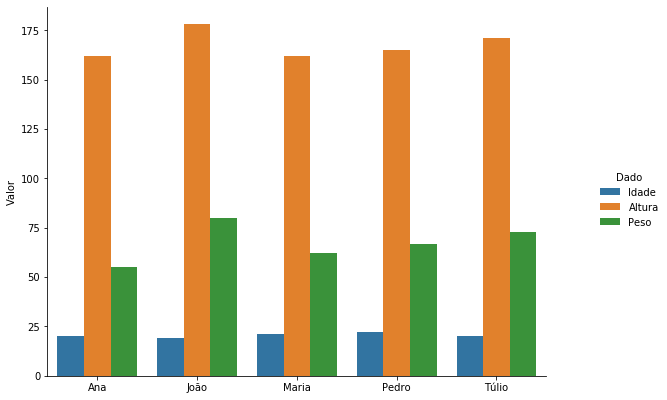

In [26]:
grafico = sns.catplot(x='index', y='Valor', hue='Dado', data = df_dict_series_sns.reset_index(), kind='bar')
grafico.ax.set_xlabel(''); grafico.fig.set_size_inches(10,6)

## BoxPlot e Alternativas

* Tanto o *BoxPlot* quanto as alternativas que apresentaremos aqui (*violinplot* e *boxenplot*) fazem parte do **catplot**.
* O *boxenplot* foi criado por Hadley Wickham (criador do *ggplot2* e da maioria dos pacotes do *tidyverse* do *R*) e colaboradores e é uma generalização do *BoxPlot* que apresenta mais quantis. Foi introduzido como *letter-value plots*: https://vita.had.co.nz/papers/letter-value-plot.html. 
* O *violinplot* recebe este nome pois seu gráfico se assemelha a um violino.
* Para construir um *BoxPlot* utiliza-se o argumento *kind='box'*;
* Para construir um *violinplot* utiliza-se o argumento *kind='violin'*;
* Para construir um *boxenplot* (ou *letter-value plot*) utiliza-se o argumento *kind='boxen'*.

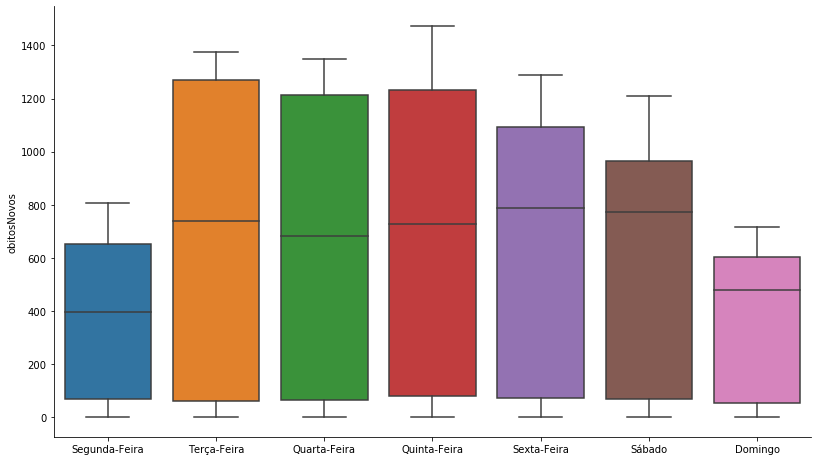

In [27]:
grafico = sns.catplot(x='Dia', y='obitosNovos', kind = 'box', data=covid_BR_obitos, order = ['Segunda-Feira', 'Terça-Feira',
                                                'Quarta-Feira', 'Quinta-Feira', 'Sexta-Feira', 'Sábado', 'Domingo'])
grafico.ax.set_xlabel(''); grafico.fig.set_size_inches(13,7)

In [28]:
covid_regioes_diarios_px = covid_BR.set_index(
    'data').query('regiao != "Brasil"')[['obitosNovos', 'regiao']].reset_index().rename(
    {'obitosNovos':'Óbitos','regiao':'Região','data':'Data'},axis=1)
covid_regioes_diarios_px = covid_regioes_diarios_px.groupby(['Região','Data']).sum()/2
covid_regioes_diarios_px = covid_regioes_diarios_px.reset_index().set_index('Data')
covid_regioes_diarios_px

,Região,Óbitos
Data,,
2020-02-25,Centro-Oeste,0.0
2020-02-26,Centro-Oeste,0.0
2020-02-27,Centro-Oeste,0.0
2020-02-28,Centro-Oeste,0.0
2020-02-29,Centro-Oeste,0.0
...,...,...
2020-07-21,Sul,166.0
2020-07-22,Sul,146.0
2020-07-23,Sul,165.0


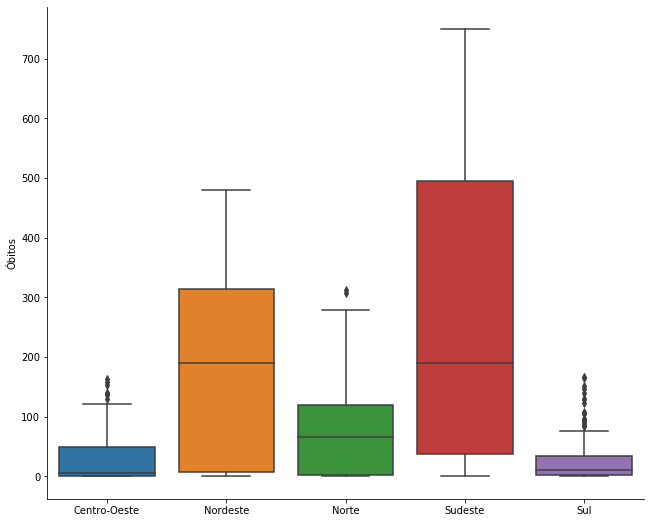

In [29]:
grafico = sns.catplot(x='Região', y='Óbitos', kind = 'box', data=covid_regioes_diarios_px)
grafico.ax.set_xlabel(''); grafico.fig.set_size_inches(10,8)

Na presença de muitos *outliers*, como é o caso do gráfico anterior, é interessante considerar uma alternativa ao *BoxPlot*.

Vamos ver agora o *Boxen Plot* (ou *letter-value plots*). Este plot considera os quantis: ..., 0.8%, 1.56%, 3.13%, 6.25%, 12.5%, 25%, 50%, 75%, 87.5%, 93.75%, 96.88%, 98.44%, 99.24%, ...



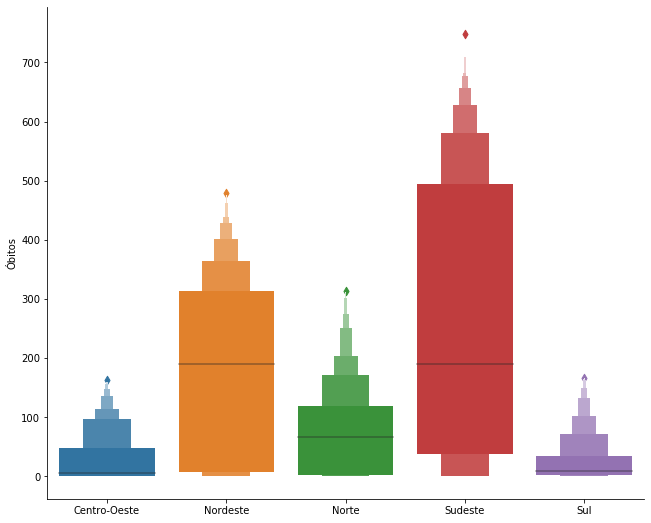

In [30]:
grafico = sns.catplot(x='Região', y='Óbitos', kind = 'boxen', data=covid_regioes_diarios_px)
grafico.ax.set_xlabel(''); grafico.fig.set_size_inches(10,8)

Porém num gráfico sem muitos *outliers* o *Boxen Plot* não fica muito diferente do *BoxPlot*.

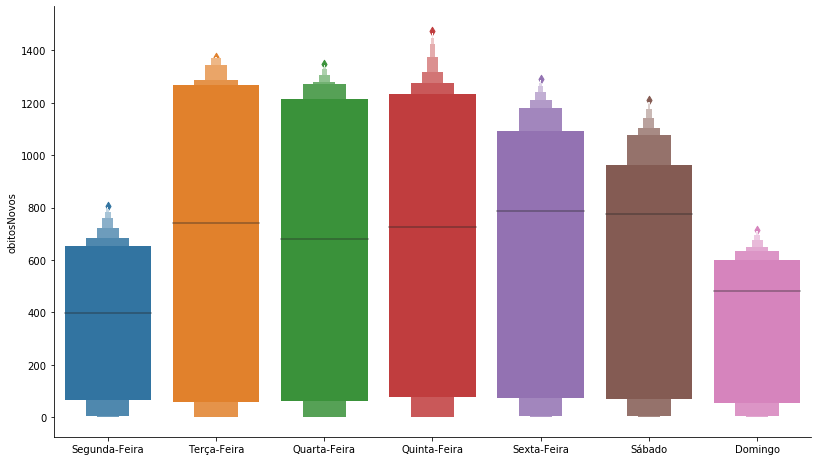

In [31]:
grafico = sns.catplot(x='Dia', y='obitosNovos', kind = 'boxen', data=covid_BR_obitos, order = ['Segunda-Feira', 'Terça-Feira',
                                                'Quarta-Feira', 'Quinta-Feira', 'Sexta-Feira', 'Sábado', 'Domingo'])
grafico.ax.set_xlabel('');grafico.fig.set_size_inches(13,7)

* Na presença de muitos *outliers* também é preferível um *violinplot* no lugar de um *BoxPlot* para tornar visível o que está ocorrendo.

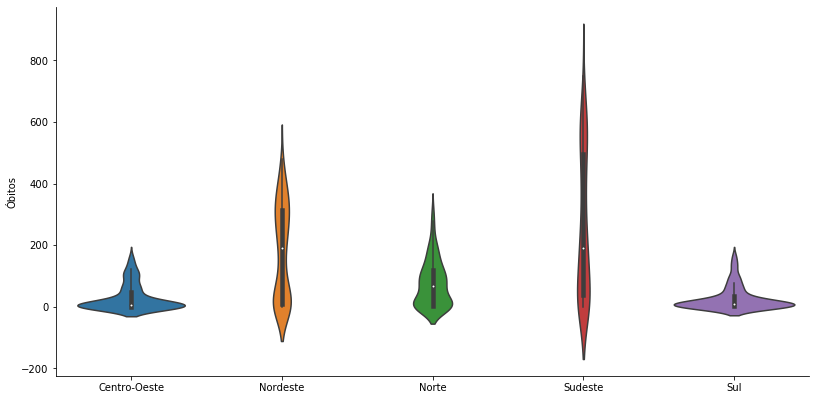

In [32]:
grafico = sns.catplot(x='Região', y='Óbitos', kind = 'violin', data=covid_regioes_diarios_px)
grafico.ax.set_xlabel('');grafico.fig.set_size_inches(13,6)

* Muitas vezes é interessante sobrepor um *violinplot* a um *swarmplot* para evidenciar o comportamento da distribuição dos dados.

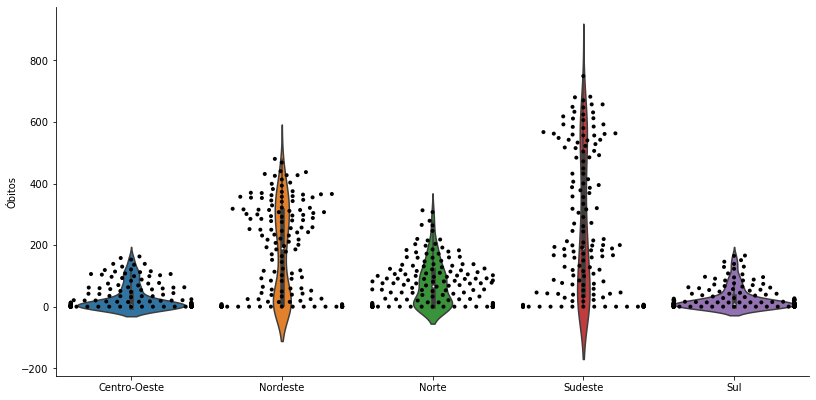

In [33]:
grafico = sns.catplot(x='Região', y='Óbitos', kind = 'violin', data=covid_regioes_diarios_px)
sns.swarmplot(x='Região', y='Óbitos', data=covid_regioes_diarios_px, ax = grafico.ax, size=4, color='k') # k = black, b = blue
grafico.ax.set_xlabel('');grafico.fig.set_size_inches(13,6)

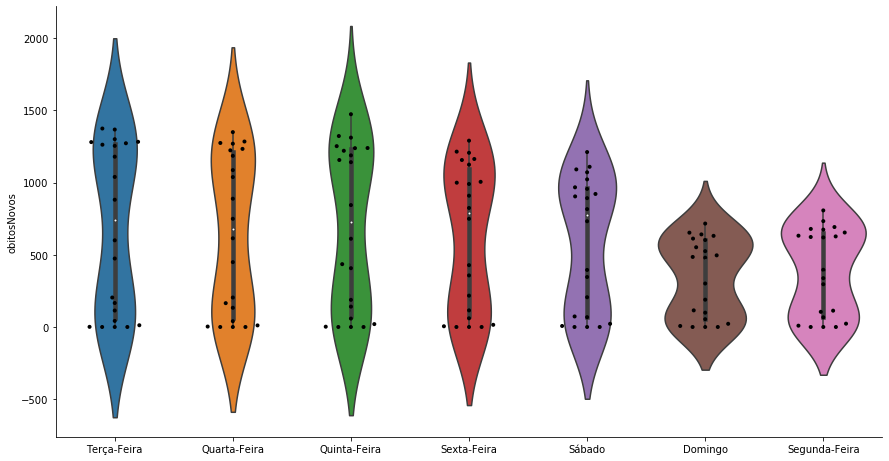

In [34]:
grafico = sns.catplot(x='Dia', y='obitosNovos', kind = 'violin', data=covid_BR_obitos)
sns.swarmplot(x='Dia', y='obitosNovos', data=covid_BR_obitos, ax = grafico.ax, size=4, color='k') 
grafico.ax.set_xlabel(''); grafico.fig.set_size_inches(15,7)

## Histogramas

* O *seaborn* constrói histogramas a partir da função **distplot** e por padrão possui um estimador de densidade baseado no núcleo gaussiano. Podemos retirar o estimador de densidade utilizando o argumento *kde=False*.

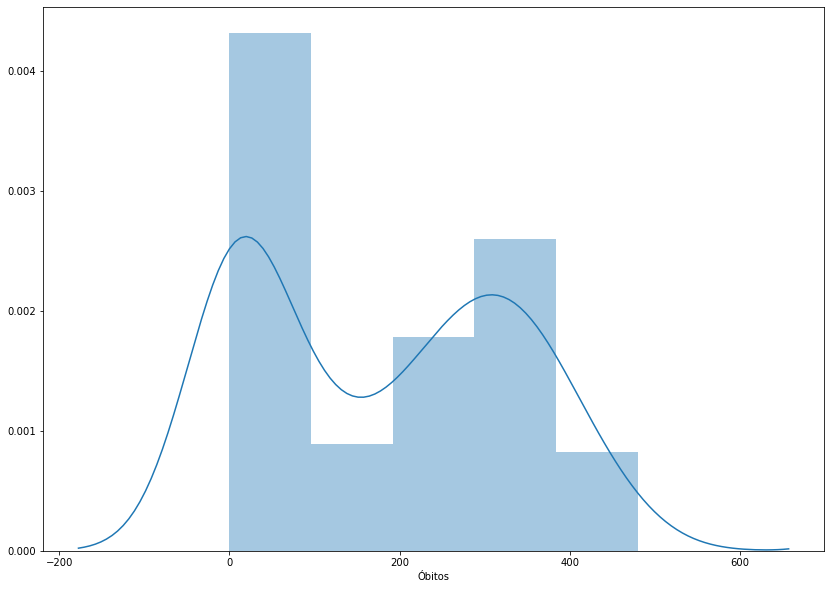

In [35]:
fig, ax = plt.subplots(figsize=(14,10))
_ = sns.distplot(covid_regioes_diarios_px.query('Região=="Nordeste"')['Óbitos'], ax=ax)

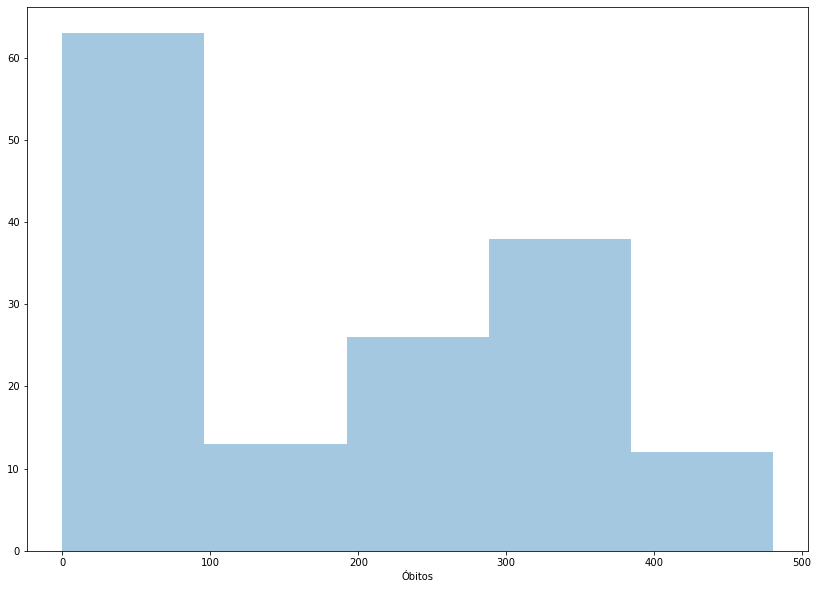

In [36]:
fig, ax = plt.subplots(figsize=(14,10))
_ = sns.distplot(covid_regioes_diarios_px.query('Região=="Nordeste"')['Óbitos'], kde=False, ax=ax)

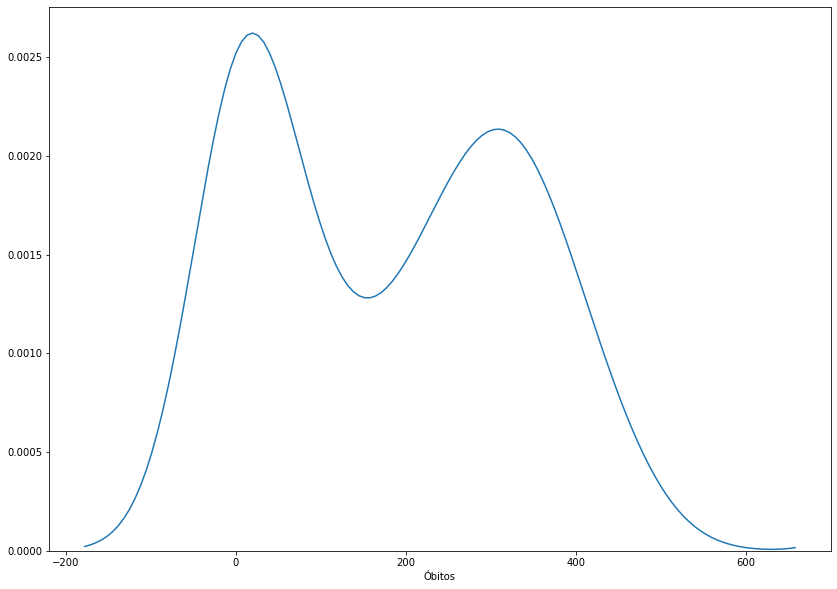

In [37]:
fig, ax = plt.subplots(figsize=(14,10))
_ =  sns.distplot(covid_regioes_diarios_px.query('Região=="Nordeste"')['Óbitos'], hist=False)

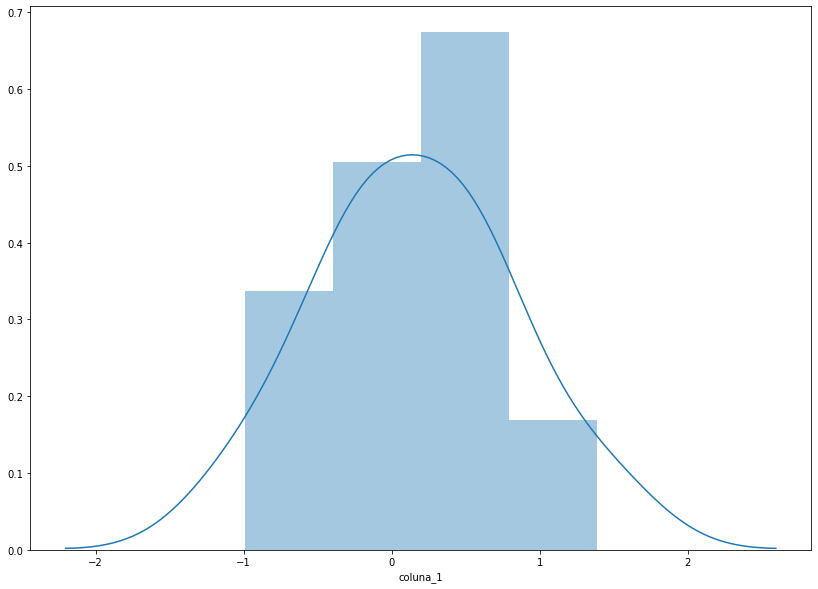

In [38]:
fig, ax = plt.subplots(figsize=(14,10))
_ = sns.distplot(df_exemplo['coluna_1'])

* Se quisermos sobrepor dois histogramas, devemos usar a função *FacetGrid* do *seaborn*, que permite construir vários gráficos bidimensionais simultaneamente, com a cor sendo dada por uma terceira variável.

* Devemos definir qual o *DataFrame* que iremos trabalhar e qual a variável que queremos que forneça a cor;
* Em seguida, devemos aplicar *map* ao gráfico e definir qual será o tipo de gráfico que queremos, qual variável e quais os parâmetros de interesse.

Para criar gráficos de histogramas com cores, vamos utilizar como base a função criada por *lbalazscs* no link https://github.com/mwaskom/seaborn/issues/861

Fizemos apenas uma leve modificação para incluir o tamanho e ajeitamos o argumento *bins* que estava faltando.

In [39]:
def distplot_with_hue(data=None, x=None, hue=None, row=None, col=None, legend=True, size=(10,10), **kwargs):
    _, bins = np.histogram(data[x].dropna())
    g = sns.FacetGrid(data, hue=hue, row=row, col=col)
    g.map(sns.distplot, x, bins=bins, **kwargs)
    g.fig.set_size_inches(size)
    if legend and (hue is not None) and (hue not in [x, row, col]):
        g.add_legend(title=hue) 

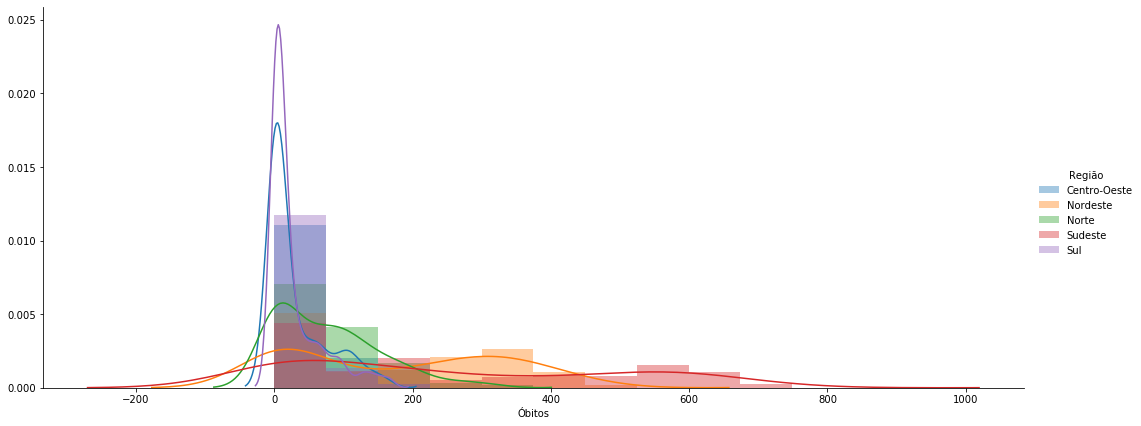

In [40]:
distplot_with_hue(data=covid_regioes_diarios_px, x='Óbitos', hue='Região', hist=True, size=(18,7))

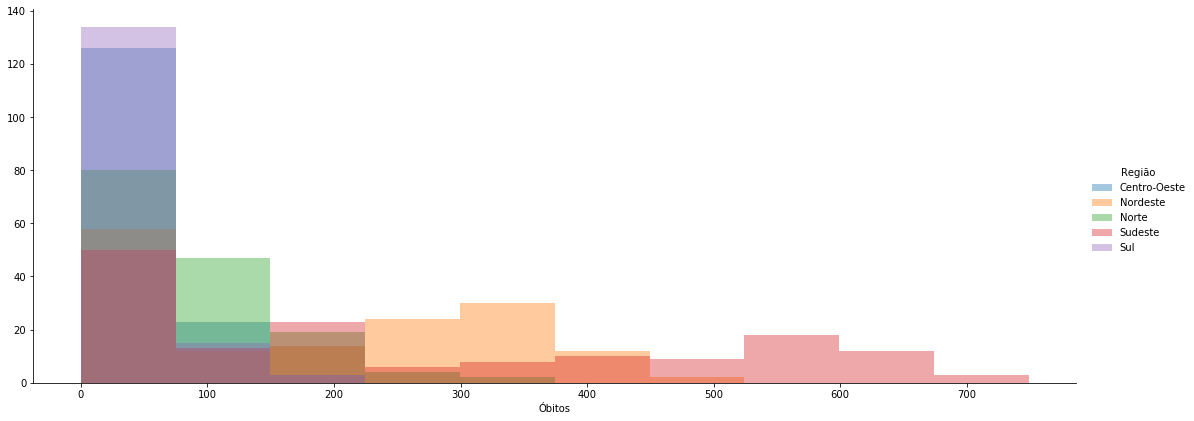

In [41]:
distplot_with_hue(data=covid_regioes_diarios_px, x='Óbitos', hue='Região', hist=True, size=(18,7), kde=False)

## Distribuição Conjunta e Marginais

* O histograma nos permite verificar a distribuição de uma ou mais variáveis, mas sem levar outras variáveis em conta.

* Para verificar como duas variáveis se comportam conjuntamente, isto é, sua distribuição conjunta, assim como suas distribuições individuais (marginais), podemos utilizar a função **jointplot** do *seaborn*.

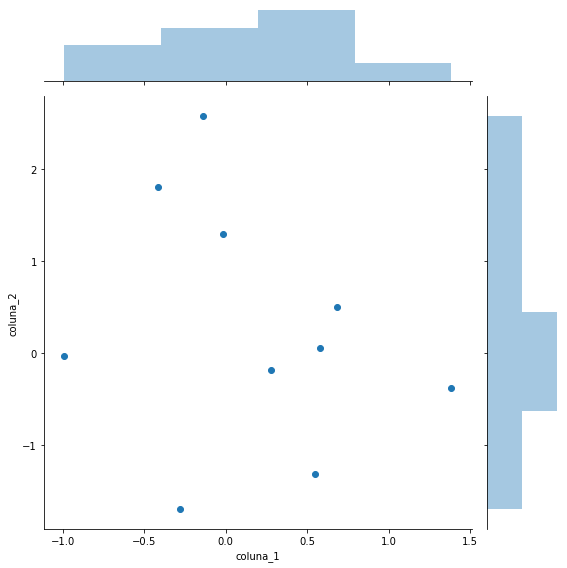

In [42]:
_ = sns.jointplot(x = 'coluna_1', y = 'coluna_2', data=df_exemplo, height=8)

In [43]:
covid_regioes_diarios = pd.DataFrame()

regioes = covid_BR.query('regiao != "Brasil"')['regiao'].drop_duplicates().array

for regiao in regioes:
    temp_series = covid_BR.set_index('data').query('regiao == @regiao')['obitosNovos'].groupby('data').sum()/2
    temp_series.name = 'obitos_' + regiao
    covid_regioes_diarios = pd.concat([covid_regioes_diarios, temp_series], axis=1)
    
covid_regioes_diarios.index = pd.to_datetime(covid_regioes_diarios.index)
covid_regioes_diarios.head()

,obitos_Norte,obitos_Nordeste,obitos_Sudeste,obitos_Sul,obitos_Centro-Oeste
data,,,,,
2020-02-25,0.0,0.0,0.0,0.0,0.0
2020-02-26,0.0,0.0,0.0,0.0,0.0
2020-02-27,0.0,0.0,0.0,0.0,0.0
2020-02-28,0.0,0.0,0.0,0.0,0.0
2020-02-29,0.0,0.0,0.0,0.0,0.0


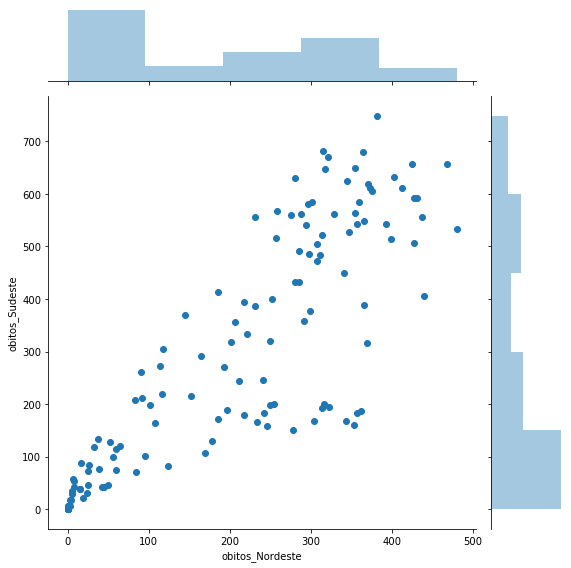

In [44]:
_ = sns.jointplot(x='obitos_Nordeste', y='obitos_Sudeste', data = covid_regioes_diarios, height=8)

## Alterando os Estilos e Cores dos Gráficos

* O *seaborn* possui 5 estilos pré-definidos: *darkgrid*, *whitegrid*, *dark*, *white* e *ticks*.

Vamos ver cada um deles agora.

In [45]:
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

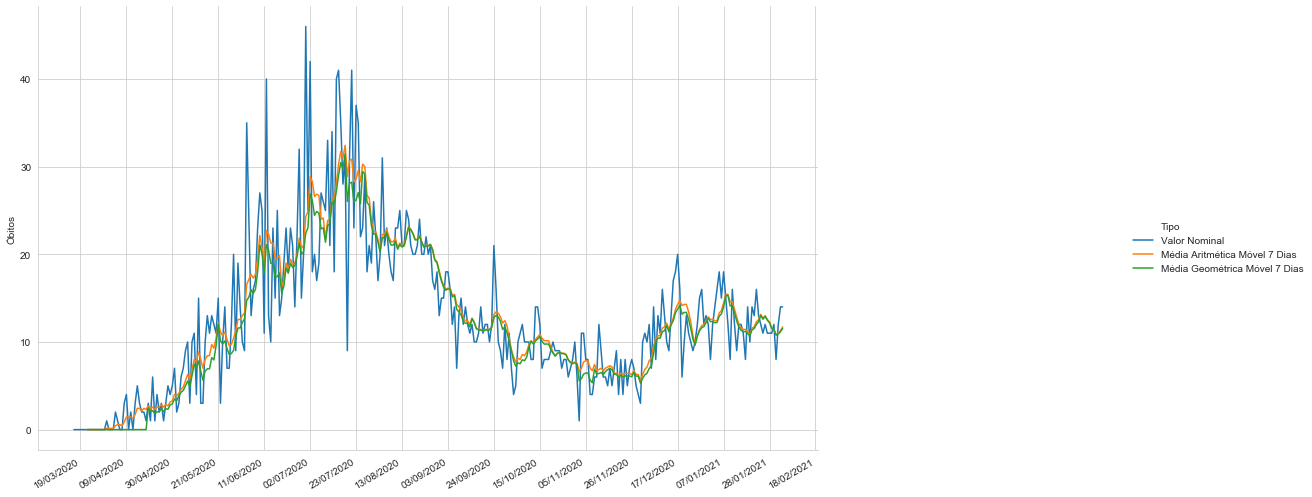

In [46]:
sns.set_style("whitegrid")
grafico = sns.relplot(x = 'data', y='Óbitos', hue = 'Tipo', data=covid_PB_obitos_df.reset_index(), kind='line')
grafico.fig.autofmt_xdate()
grafico.ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7)) #Intervalo entre os tracinhos
grafico.ax.xaxis.set_major_locator(mdates.DayLocator(interval=21)) #Intervalo entre as datas
grafico.ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y')) #Formato da data
grafico.ax.set_xlabel(''); grafico.fig.set_size_inches(20,8)

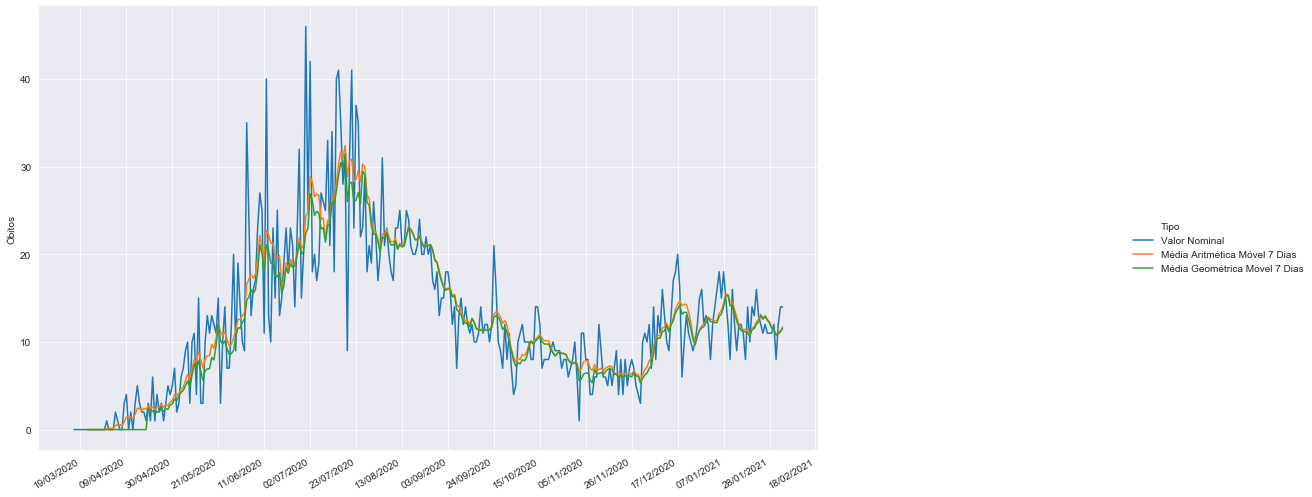

In [47]:
sns.set_style("darkgrid")
grafico = sns.relplot(x = 'data', y='Óbitos', hue = 'Tipo', data=covid_PB_obitos_df.reset_index(), kind='line')
grafico.fig.autofmt_xdate()
grafico.ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7)) #Intervalo entre os tracinhos
grafico.ax.xaxis.set_major_locator(mdates.DayLocator(interval=21)) #Intervalo entre as datas
grafico.ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y')) #Formato da data
grafico.ax.set_xlabel(''); grafico.fig.set_size_inches(20,8)

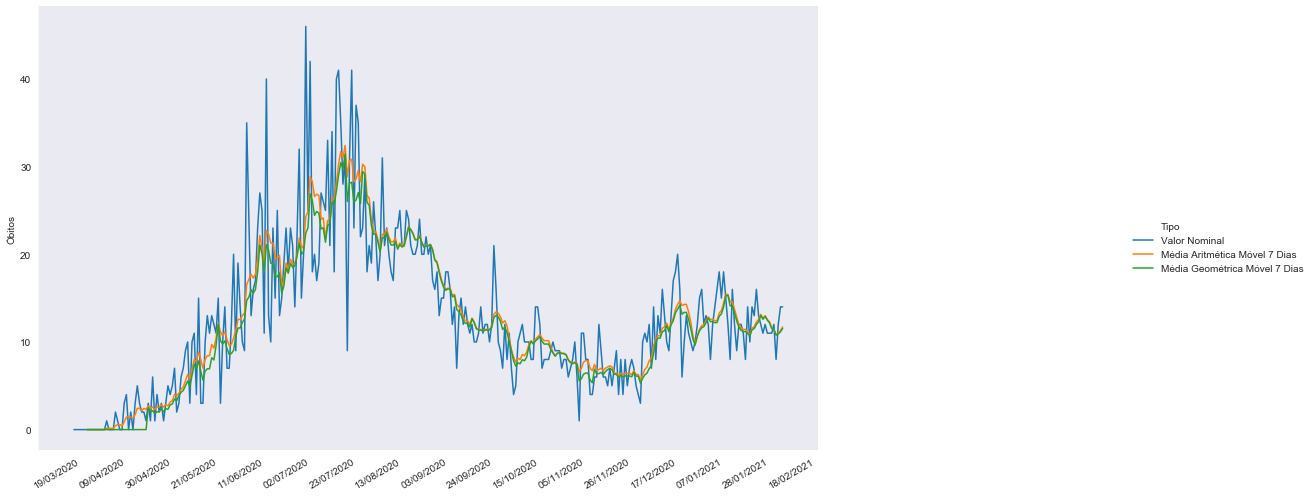

In [48]:
sns.set_style("dark")
grafico = sns.relplot(x = 'data', y='Óbitos', hue = 'Tipo', data=covid_PB_obitos_df.reset_index(), kind='line')
grafico.fig.autofmt_xdate()
grafico.ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7)) #Intervalo entre os tracinhos
grafico.ax.xaxis.set_major_locator(mdates.DayLocator(interval=21)) #Intervalo entre as datas
grafico.ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y')) #Formato da data
grafico.ax.set_xlabel(''); grafico.fig.set_size_inches(20,8)

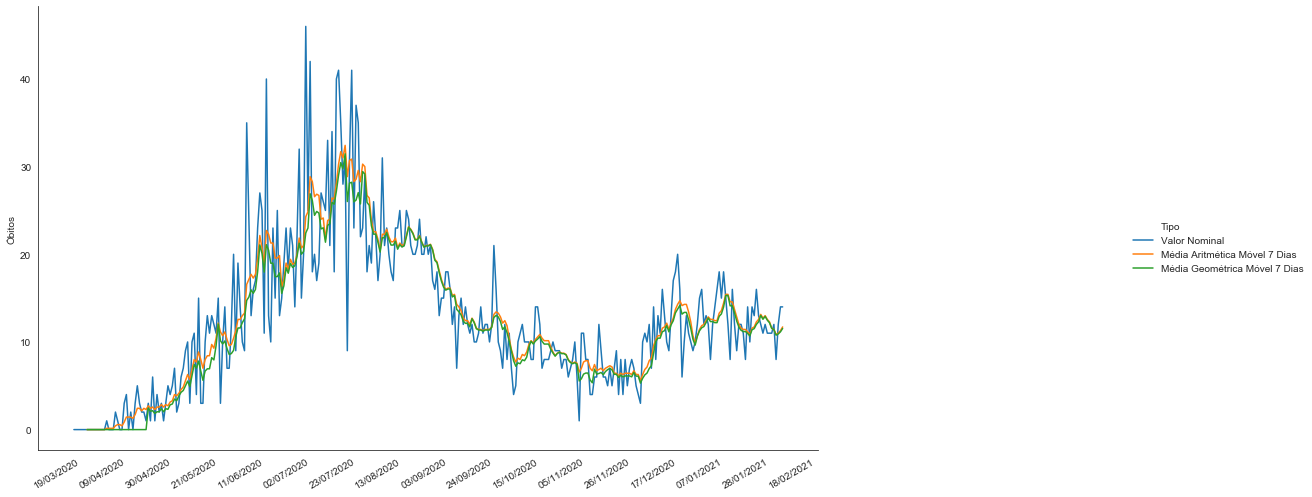

In [49]:
sns.set_style("white")
grafico = sns.relplot(x = 'data', y='Óbitos', hue = 'Tipo', data=covid_PB_obitos_df.reset_index(), kind='line')
grafico.fig.autofmt_xdate()
grafico.ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7)) #Intervalo entre os tracinhos
grafico.ax.xaxis.set_major_locator(mdates.DayLocator(interval=21)) #Intervalo entre as datas
grafico.ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y')) #Formato da data
grafico.ax.set_xlabel(''); grafico.fig.set_size_inches(20,8)

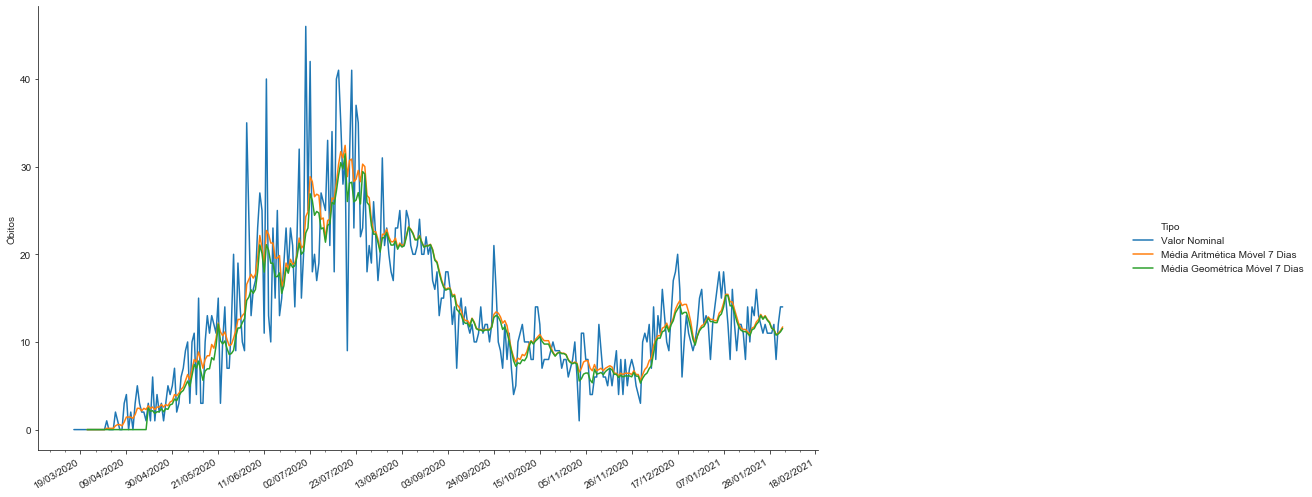

In [50]:
sns.set_style("ticks") # A diferença com o anterior são os "ticks" no eixo x
grafico = sns.relplot(x = 'data', y='Óbitos', hue = 'Tipo', data=covid_PB_obitos_df.reset_index(), kind='line')
grafico.fig.autofmt_xdate()
grafico.ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7)) #Intervalo entre os tracinhos
grafico.ax.xaxis.set_major_locator(mdates.DayLocator(interval=21)) #Intervalo entre as datas
grafico.ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y')) #Formato da data
grafico.ax.set_xlabel(''); grafico.fig.set_size_inches(20,8)

## Adicionando ou Removendo Molduras

* Podemos utilizar a função **despine** para adicionar ou remover molduras num plot do *seaborn*.
* Colocamos qual o lado que queremos adicionar moldura e remover, e colocamos o valor *True* para remover e *False* para adicionar.

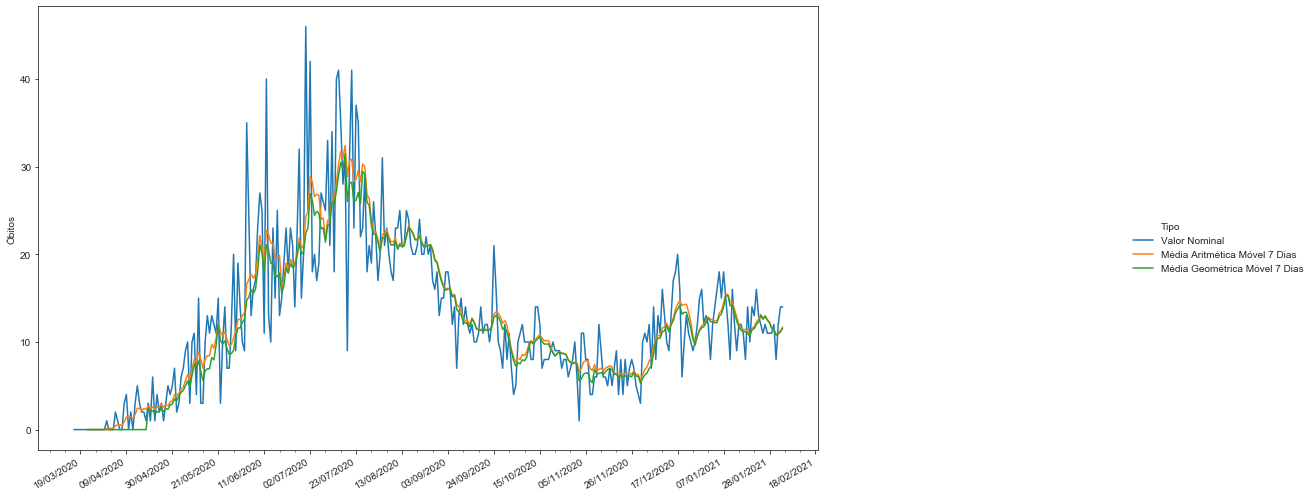

In [51]:
sns.set_style("ticks")
grafico = sns.relplot(x = 'data', y='Óbitos', hue = 'Tipo', data=covid_PB_obitos_df.reset_index(), kind='line')
grafico.fig.autofmt_xdate()
grafico.ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7)) #Intervalo entre os tracinhos
grafico.ax.xaxis.set_major_locator(mdates.DayLocator(interval=21)) #Intervalo entre as datas
grafico.ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y')) #Formato da data
grafico.ax.set_xlabel(''); grafico.fig.set_size_inches(20,8)
sns.despine(right=False, top=False)

* Podemos aumentar a distância dos dados com relação à moldura com o argumento *offset=dist*, onde *dist* indica a distância que queremos que o gráfico fique da moldura. Ao utilizarmos este argumento as bordas se afastarão naturalmente, devido à distância.

* Podemos realizar um "corte" estético na moldura utilizando o argumento *trim=True*. É uma boa combinação com o *offset* acima.

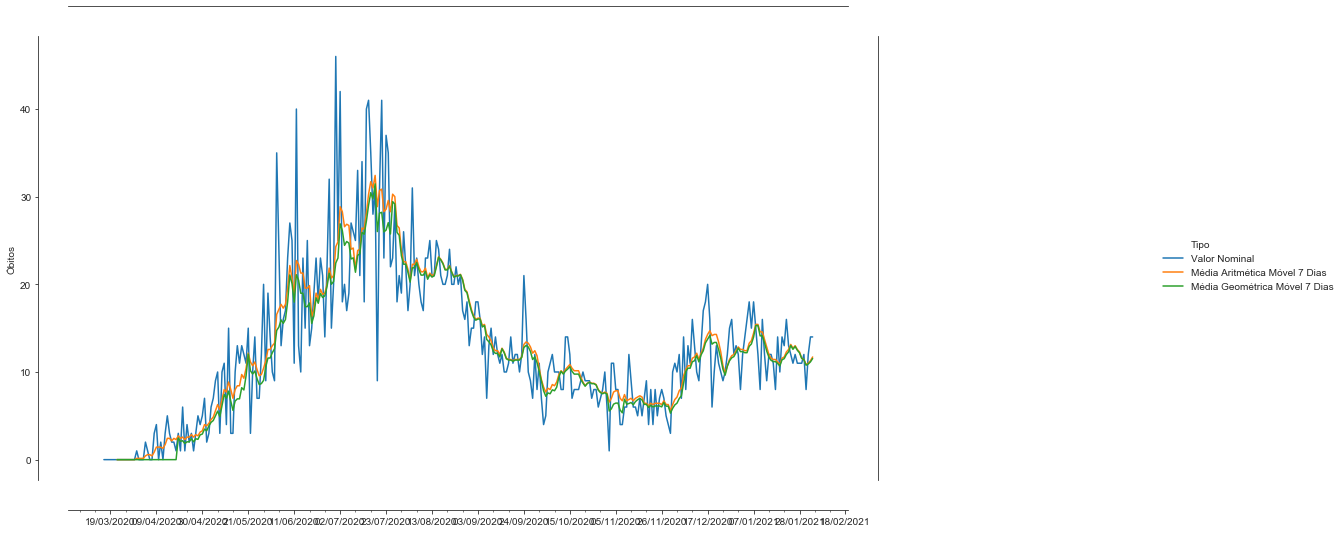

In [52]:
sns.set_style("ticks")
grafico = sns.relplot(x = 'data', y='Óbitos', hue = 'Tipo', data=covid_PB_obitos_df.reset_index(), kind='line')
grafico.fig.autofmt_xdate()
grafico.ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7)) #Intervalo entre os tracinhos
grafico.ax.xaxis.set_major_locator(mdates.DayLocator(interval=21)) #Intervalo entre as datas
grafico.ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y')) #Formato da data
grafico.ax.set_xlabel(''); grafico.fig.set_size_inches(20,8)
sns.despine(right=False, top=False, offset=30)

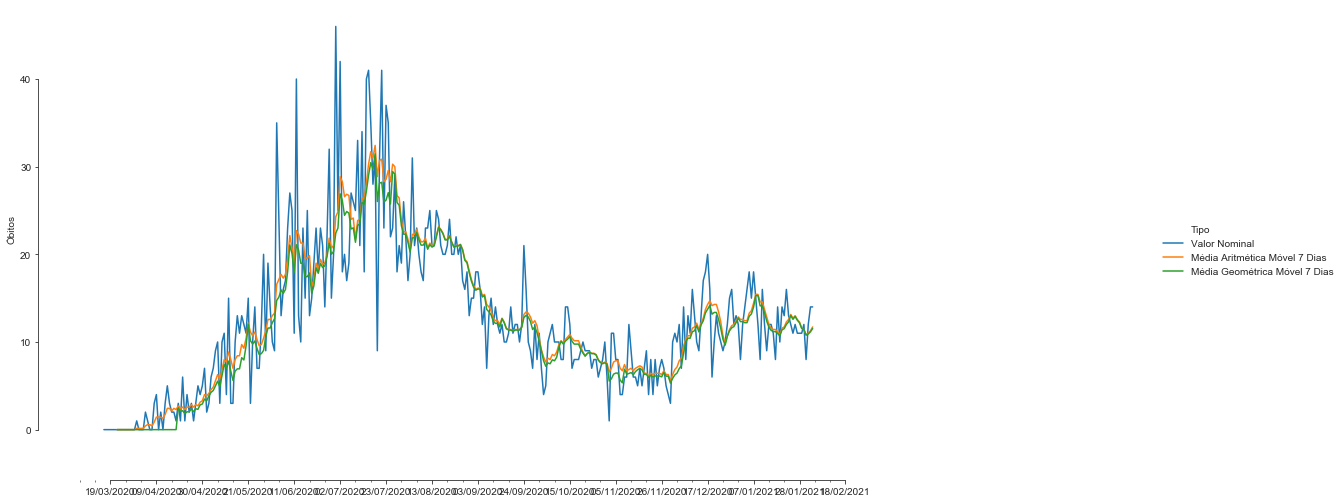

In [53]:
sns.set_style("ticks")
grafico = sns.relplot(x = 'data', y='Óbitos', hue = 'Tipo', data=covid_PB_obitos_df.reset_index(), kind='line')
grafico.fig.autofmt_xdate()
grafico.ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7)) #Intervalo entre os tracinhos
grafico.ax.xaxis.set_major_locator(mdates.DayLocator(interval=21)) #Intervalo entre as datas
grafico.ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y')) #Formato da data
grafico.ax.set_xlabel(''); grafico.fig.set_size_inches(20,8)
sns.despine(offset=30, trim=True)

## Definir o contexto em que o gráfico será utilizado para definir a escala

* O *seaborn* possui contextos pré-definidos que mudam a escala do gráfico para melhor satisfazer a aplicação de interesse.

* Para definir o contexto, utilizamos a função **set_context**. A função é bem flexível e para facilitar já vem com 4 contextos pré-definidos: *paper*, *notebook*, *talk* e *poster*.

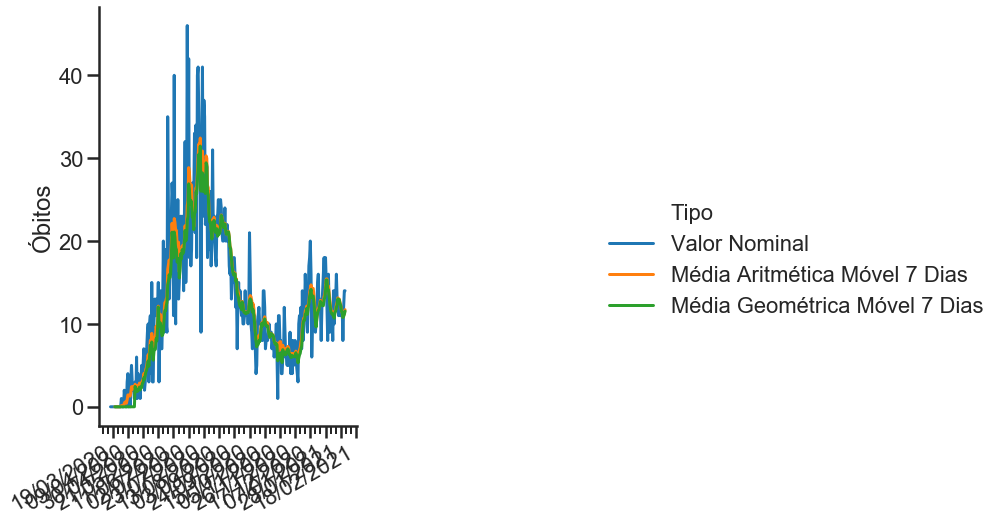

In [54]:
sns.set_context("poster")
sns.set_style("ticks")
grafico = sns.relplot(x = 'data', y='Óbitos', hue = 'Tipo', data=covid_PB_obitos_df.reset_index(), kind='line')
grafico.fig.autofmt_xdate()
grafico.ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7)) #Intervalo entre os tracinhos
grafico.ax.xaxis.set_major_locator(mdates.DayLocator(interval=21)) #Intervalo entre as datas
grafico.ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y')) #Formato da data
grafico.ax.set_xlabel(''); grafico.fig.set_size_inches(17,8)

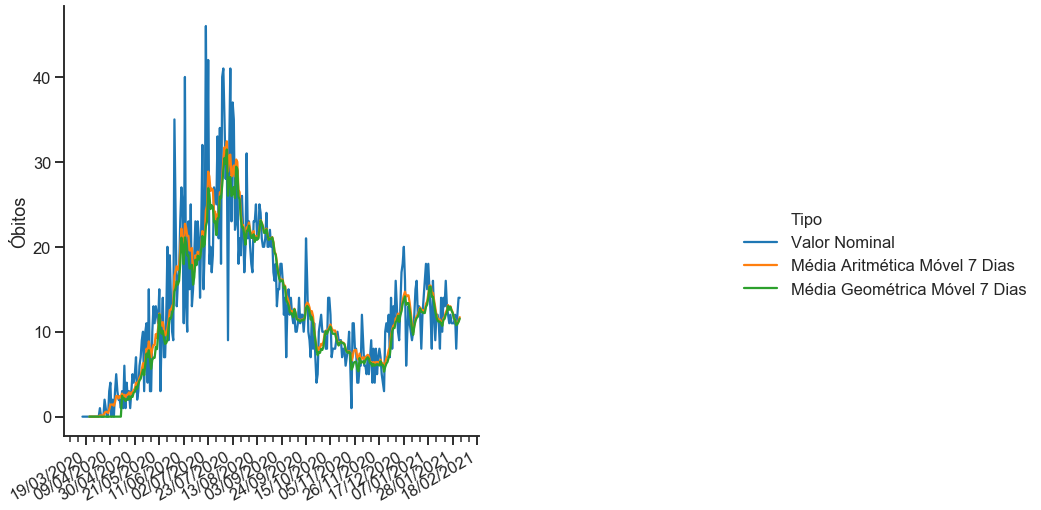

In [55]:
sns.set_context("talk")
sns.set_style("ticks")
grafico = sns.relplot(x = 'data', y='Óbitos', hue = 'Tipo', data=covid_PB_obitos_df.reset_index(), kind='line')
grafico.fig.autofmt_xdate()
grafico.ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7)) #Intervalo entre os tracinhos
grafico.ax.xaxis.set_major_locator(mdates.DayLocator(interval=21)) #Intervalo entre as datas
grafico.ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y')) #Formato da data
grafico.ax.set_xlabel(''); grafico.fig.set_size_inches(17,8)

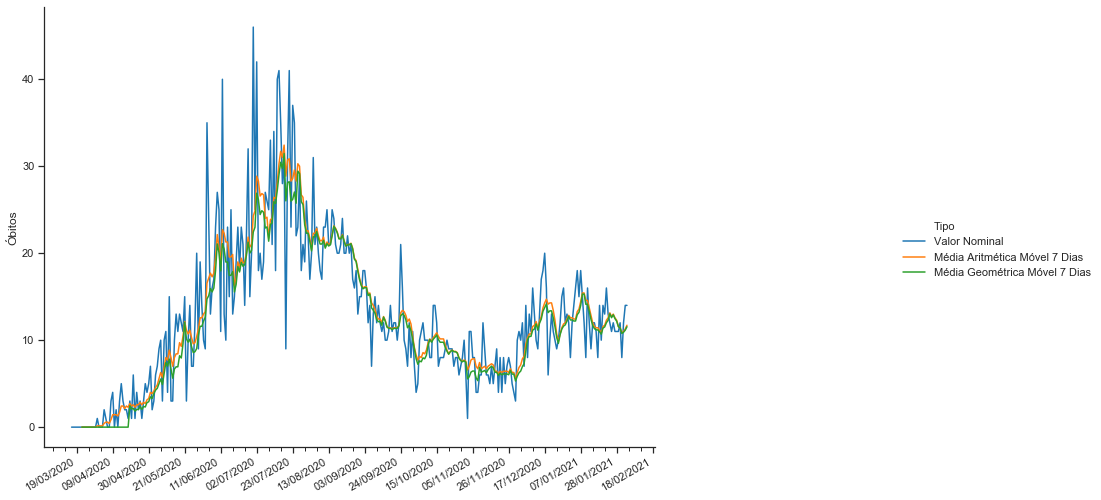

In [56]:
sns.set_context("notebook")
sns.set_style("ticks")
grafico = sns.relplot(x = 'data', y='Óbitos', hue = 'Tipo', data=covid_PB_obitos_df.reset_index(), kind='line')
grafico.fig.autofmt_xdate()
grafico.ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7)) #Intervalo entre os tracinhos
grafico.ax.xaxis.set_major_locator(mdates.DayLocator(interval=21)) #Intervalo entre as datas
grafico.ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y')) #Formato da data
grafico.ax.set_xlabel(''); grafico.fig.set_size_inches(17,8)

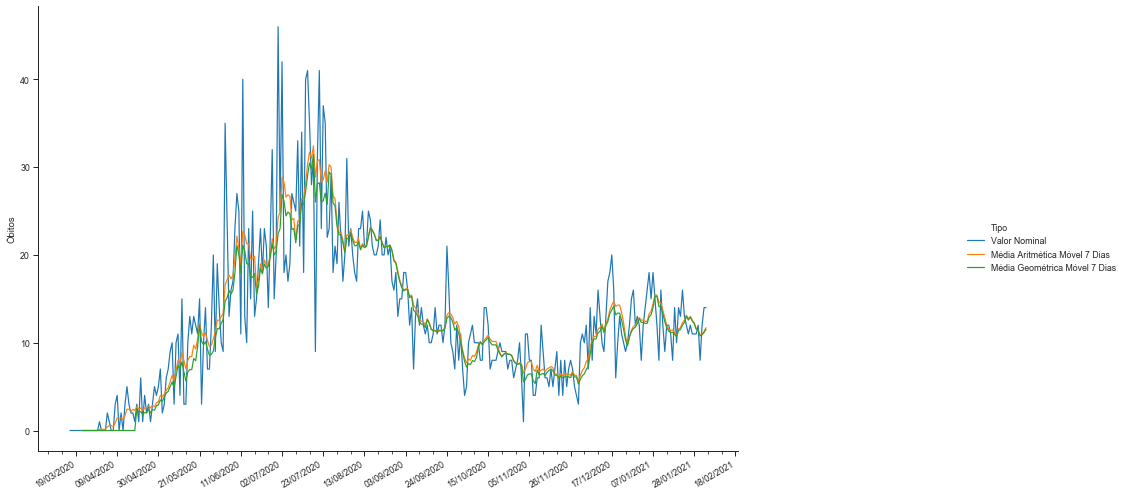

In [57]:
sns.set_context("paper")
sns.set_style("ticks")
grafico = sns.relplot(x = 'data', y='Óbitos', hue = 'Tipo', data=covid_PB_obitos_df.reset_index(), kind='line')
grafico.fig.autofmt_xdate()
grafico.ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7)) #Intervalo entre os tracinhos
grafico.ax.xaxis.set_major_locator(mdates.DayLocator(interval=21)) #Intervalo entre as datas
grafico.ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y')) #Formato da data
grafico.ax.set_xlabel(''); grafico.fig.set_size_inches(17,8)

## Definindo a paleta de cores a ser utilizada

* É possível personalizar a paleta a ser utilizada, porém podemos escolher dentre uma lista (extremamente extensa) uma paleta que gostamos e utilizá-la.

* Uma lista extensa pode ser encontrada em: https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f

* Utilizando a função **set_palette**, é possível definir uma paleta que será utilizada para todos os gráficos.

* É possível utilizar uma paleta apenas uma vez, construindo o gráfico dentro de um enunciado *with* com a função **color_palette**.

* É também possível utilizar uma paleta apenas uma vez utilizando o argumento *palette* dentro das funções de construções gráficas.

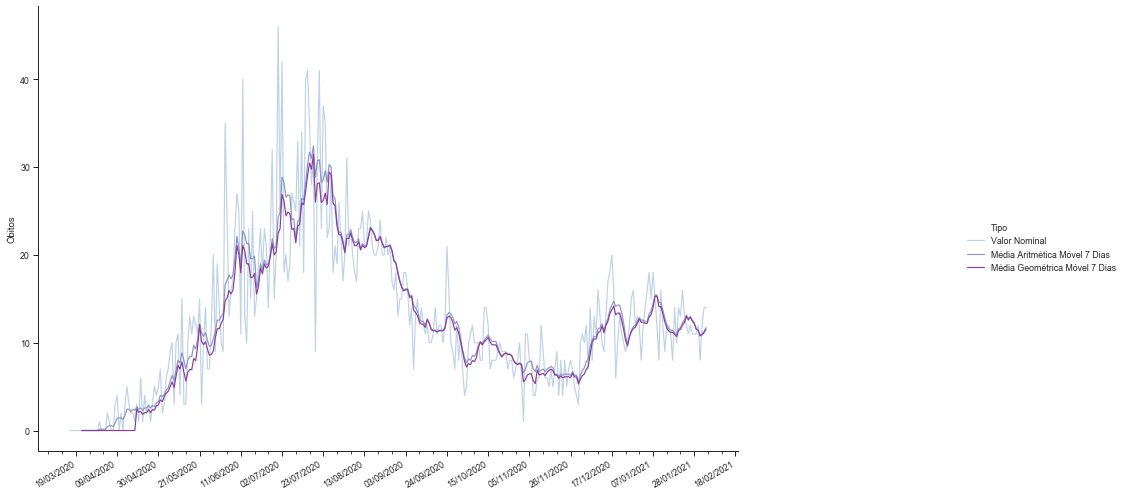

In [58]:
sns.set_context("paper")
sns.set_style("ticks")
grafico = sns.relplot(x = 'data', y='Óbitos', hue = 'Tipo', data=covid_PB_obitos_df.reset_index(), kind='line',
                     palette = 'BuPu')
grafico.fig.autofmt_xdate()
grafico.ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7)) #Intervalo entre os tracinhos
grafico.ax.xaxis.set_major_locator(mdates.DayLocator(interval=21)) #Intervalo entre as datas
grafico.ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y')) #Formato da data
grafico.ax.set_xlabel(''); grafico.fig.set_size_inches(17,8)

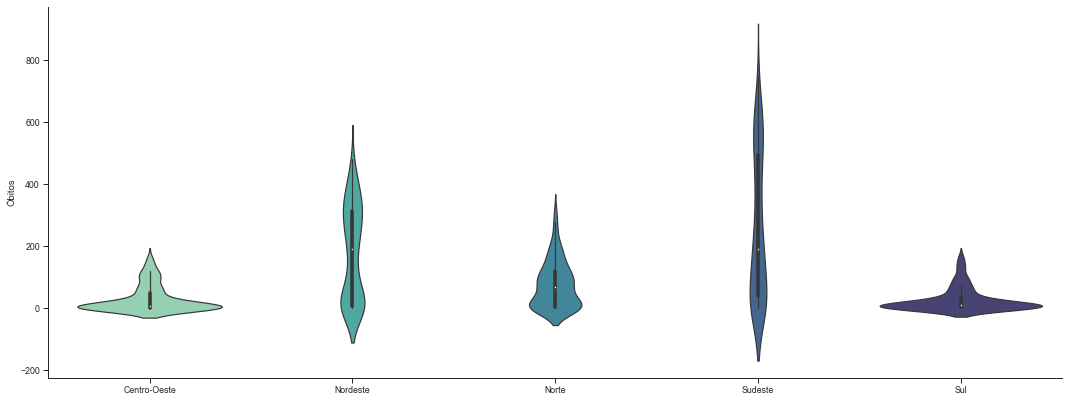

In [59]:
with sns.color_palette('mako_r'):
    grafico = sns.catplot(x='Região', y='Óbitos', kind = 'violin', data=covid_regioes_diarios_px)
    grafico.ax.set_xlabel(''); grafico.fig.set_size_inches(17,6)

In [60]:
paleta_atual = sns.color_palette() # Obter a paleta de cores sendo utilizada
# Caso haja interesse em guardar este valor, tomar cuidado para não rodar este comando
# enquanto outra paleta esteja sendo utilizada

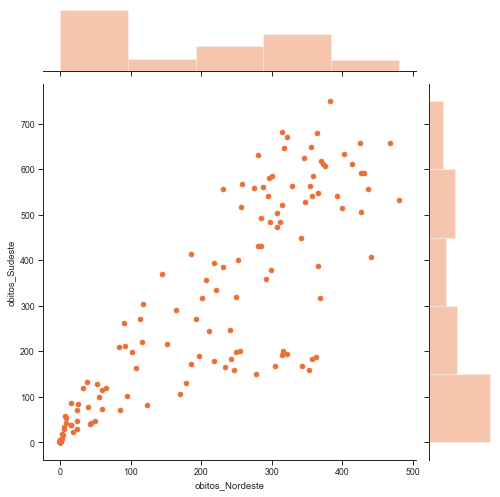

In [61]:
sns.set_palette('icefire_r')
_ = sns.jointplot(x='obitos_Nordeste', y='obitos_Sudeste', data = covid_regioes_diarios, height=7)

In [62]:
sns.set_palette(paleta_atual) # Voltar para a paleta padrão